<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук ВШЭ <br> Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание 2. <br> Анализ данных по перелетам между городами США в 2008 году с помощью Pandas и Seaborn</center>

In [1]:
# Python 2 and 3 compatibility
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
%pylab inline
#import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (~ 114 Mb, при разархивации - ~ 690 Mb). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).
Данные  содержат перелеты между аэропортами США в 2008 году.

**Считаем данные в память в объект Pandas.DataFrame (это может занять пару минут).**

In [5]:
flights_df = pd.read_csv('../../data/flights_2008.csv.bz2')

In [6]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 29)
Index([u'Year', u'Month', u'DayofMonth', u'DayOfWeek', u'DepTime',
       u'CRSDepTime', u'ArrTime', u'CRSArrTime', u'UniqueCarrier',
       u'FlightNum', u'TailNum', u'ActualElapsedTime', u'CRSElapsedTime',
       u'AirTime', u'ArrDelay', u'DepDelay', u'Origin', u'Dest', u'Distance',
       u'TaxiIn', u'TaxiOut', u'Cancelled', u'CancellationCode', u'Diverted',
       u'CarrierDelay', u'WeatherDelay', u'NASDelay', u'SecurityDelay',
       u'LateAircraftDelay'],
      dtype='object')


In [7]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
CRSDepTime,1955,735,620,930,1755
ArrTime,2211,1002,804,1054,1959
CRSArrTime,2225,1000,750,1100,1925
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920


In [8]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,1333.830046,478.068895,1.0,NaN,NaN,NaN,2400.0
CRSDepTime,7009728.0,1326.085663,464.250911,0.0,925.0,1320.0,1715.0,2359.0
ArrTime,6858079.0,1481.258227,505.225129,1.0,NaN,NaN,NaN,2400.0
CRSArrTime,7009728.0,1494.801154,482.672822,0.0,1115.0,1517.0,1907.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ActualElapsedTime,6855029.0,127.322424,70.187308,12.0,NaN,NaN,NaN,1379.0


**Число уникальных рейсов:**

In [9]:
flights_df['FlightNum'].nunique()

7539

**Мы можем выполнять группировки для расчета различных аггрегированных статистик.**

**Найдем топ-3 рейсов, совершивших самые длинные перелеты за 2008 год.**

In [10]:
flights_df.groupby('FlightNum')['Distance']\
  .sum().sort_values(ascending=False)\
  .iloc[0:3]

FlightNum
1     7793942
15    7639878
2     6888300
Name: Distance, dtype: int64

**Или так:**

In [11]:
flights_df.groupby('FlightNum')\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': {'_total': np.sum}})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Cancelled     Distance               
             _total         mean      sum count
FlightNum                                      
1                42  1925.380929  7793942  4048
15               51  1823.795178  7639878  4189
2                53  1873.347838  6888300  3677

**Построение сводной таблицы:**

In [12]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**Бывает удобно "раскрашивать" такие сводные таблицы:**

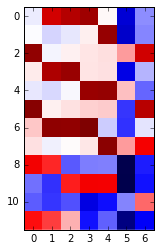

In [13]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic',interpolation='none')

**Гистограмма длин перелетов.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1138b6050>]], dtype=object)

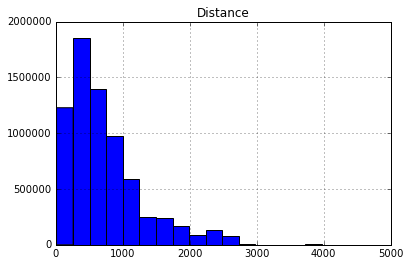

In [14]:
flights_df.hist('Distance', bins=20)

**Гистограмма частот перелетов в зависимости от даты.**

In [15]:
flights_df['Date'] = pd.to_datetime(flights_df.Year*10000 + 
                                    flights_df.Month*100 + 
                                    flights_df.DayofMonth, 
                            format='%Y%m%d')

In [16]:
num_flights_by_date = flights_df.groupby('Date')['FlightNum'].agg('count')

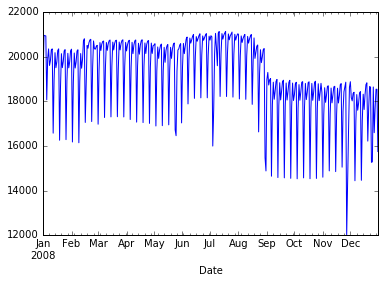

In [17]:
num_flights_by_date.plot()

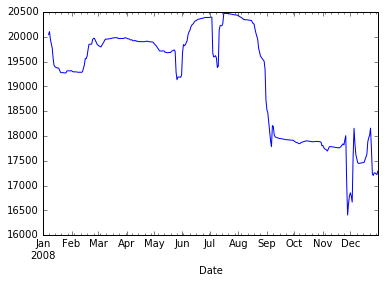

In [18]:
pd.rolling_mean(num_flights_by_date, 7).plot()

**1. Найдите топ-10 массовых перевозчиков (UniqueCarrier).**

In [16]:
# Ваш код здесь

**2. Постройте распределение причин отмены рейсов (CancellationCode).**

In [17]:
# Ваш код здесь

**3. Найдите самый популярный маршрут, отобразите статистику по данному маршруту (просто describe для подвыборки).**

In [18]:
# Ваш код здесь

**4. Найдите топ-5 рейсов (по числу полетов) по каждому из типов задержек рейсов. Каким перевозчикам они принадлежат?**

In [19]:
# Ваш код здесь

**5. Определите, как распределено количество рейсов в зависимости от времени дня?**

In [20]:
# Ваш код здесь

**6. Опишите, как число полетов меняется во времени (по дням/неделям/месяцам), и проинтерпретируйте.**

In [21]:
# Ваш код здесь